In [1]:
!git clone https://github.com/amir-saniyan/HodaDatasetReader.git

Cloning into 'HodaDatasetReader'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), done.


In [2]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, f1_score
from HodaDatasetReader.HodaDatasetReader import read_hoda_dataset
from time import perf_counter
plt.style.use('fivethirtyeight')

In [ ]:
X_train, y_train = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Train 60000.cdb')
X_test, y_test = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Test 20000.cdb')

In [ ]:
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform(X_test)

In [ ]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca_lst = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(0,100,5):
  print(f'PCA{i+1} = {pca_lst[i]} ')

PCA1 = 9.15994930267334 
PCA6 = 36.29216384887695 
PCA11 = 47.642066955566406 
PCA16 = 55.25448989868164 
PCA21 = 60.69498825073242 
PCA26 = 64.64260864257812 
PCA31 = 67.72737121582031 
PCA36 = 70.16850280761719 
PCA41 = 72.18496704101562 
PCA46 = 73.87401580810547 
PCA51 = 75.26863098144531 
PCA56 = 76.5023422241211 
PCA61 = 77.57620239257812 
PCA66 = 78.50152587890625 
PCA71 = 79.31513977050781 
PCA76 = 80.04080963134766 
PCA81 = 80.69830322265625 
PCA86 = 81.30339050292969 
PCA91 = 81.84333801269531 
PCA96 = 82.34565734863281 


In [ ]:
pca = PCA(80)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

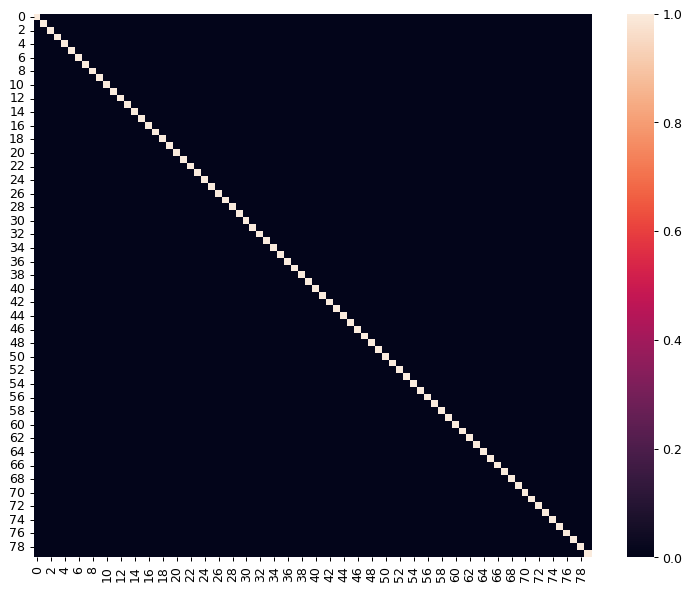

In [ ]:
fig = plt.figure(figsize=(10,8),dpi=90)
corr = np.corrcoef(X_train.T)
sns.heatmap(corr);

In [ ]:
svm =SVC()
svm.fit(X_train,y_train)
score = svm.score(X_test,y_test)
score

0.9808

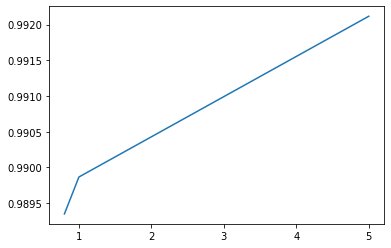

In [ ]:
from sklearn.model_selection import cross_val_score
score = {}
for i in [0.8,1,5]:
  svm = SVC(C=i)
  score[i] = (cross_val_score(svm,X_train,y_train)).mean()
plt.plot(list(score.keys()) , list(score.values()))

In [ ]:
svm =SVC(C=5)
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
print(classification_report(y_test,pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9950    0.9935    0.9942      2000
         1.0     0.9828    0.9995    0.9911      2000
         2.0     0.9675    0.9835    0.9755      2000
         3.0     0.9721    0.9585    0.9653      2000
         4.0     0.9765    0.9765    0.9765      2000
         5.0     0.9915    0.9905    0.9910      2000
         6.0     0.9915    0.9870    0.9892      2000
         7.0     0.9965    0.9910    0.9937      2000
         8.0     0.9955    0.9935    0.9945      2000
         9.0     0.9884    0.9835    0.9860      2000

    accuracy                         0.9857     20000
   macro avg     0.9857    0.9857    0.9857     20000
weighted avg     0.9857    0.9857    0.9857     20000



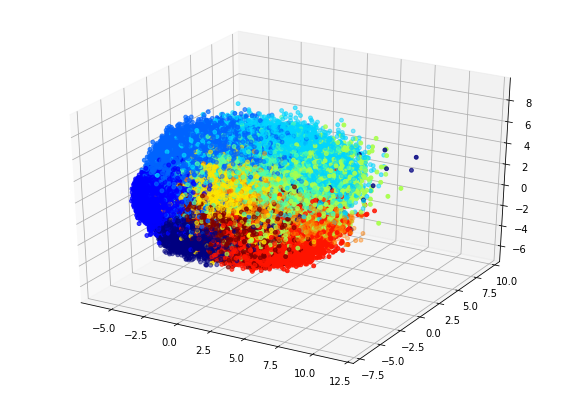

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X_train[:, 0], X_train[:, 1],X_train[:, 2], s = 15, cmap = plt.cm.get_cmap('jet', 10) , c = y_train);

ANN

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

In [ ]:
n_features = X_train.shape[1]
n_classes = len(set(y_train))

In [ ]:
input_layer = Input(shape=(n_features,), name='input_layer')

Layer_1 = Dense(40, activation="relu", name='Layer_1')(input_layer)
Layer_2 = Dense(40, activation="relu", name='Layer_2')(Layer_1)
Layer_3 = Dense(40, activation="relu", name='Layer_3')(Layer_2)
Layer_4 = Dense(40, activation="relu", name='Layer_4')(Layer_3)
Layer_5 = Dense(40, activation="relu", name='Layer_5')(Layer_4)

output = Dense(n_classes, activation="softmax", name='output')(Layer_5)

fc_model = Model(inputs=input_layer, outputs=output)

In [ ]:
metric = tf.keras.metrics.SparseCategoricalAccuracy()
opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
fc_model.compile(loss=loss,
                 optimizer=opt,
                 metrics=metric)

In [ ]:
history = fc_model.fit(X_train, y_train, epochs=100, verbose=True,
          batch_size=128, validation_data=(X_test, y_test))

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2898 - sparse_categorical_accuracy: 0.9124 - val_loss: 0.2496 - val_sparse_categorical_accuracy: 0.9239
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9725 - val_loss: 0.1865 - val_sparse_categorical_accuracy: 0.9460
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0658 - sparse_categorical_accuracy: 0.9813 - val_loss: 0.1364 - val_sparse_categorical_accuracy: 0.9611
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0502 - sparse_categorical_accuracy: 0.9850 - val_loss: 0.1385 - val_sparse_categorical_accuracy: 0.9607
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0421 - sparse_categorical_accuracy: 0.9867 - val_loss: 0.1256 - val_sparse_categorical_accuracy: 0.9646
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0326 - sparse_cate

In [ ]:
y_pred  = fc_model.predict(X_test)
y_pred[-3]

625/625 [==============================] - 1s 2ms/step


array([3.2508711e-18, 4.9015733e-14, 2.5341728e-14, 7.6776504e-25,
       2.7290787e-14, 1.2427721e-26, 6.9784429e-14, 8.5637201e-20,
       7.9947679e-14, 1.0000000e+00], dtype=float32)

In [ ]:
predicted_categories = np.argmax(y_pred, axis = 1)
predicted_categories[-3]

9

In [ ]:
print(classification_report(y_test,predicted_categories,digits=4))

              precision    recall  f1-score   support

         0.0     0.9940    0.9880    0.9910      2000
         1.0     0.9736    0.9955    0.9844      2000
         2.0     0.9495    0.9680    0.9587      2000
         3.0     0.9561    0.9470    0.9515      2000
         4.0     0.9620    0.9615    0.9617      2000
         5.0     0.9791    0.9850    0.9821      2000
         6.0     0.9828    0.9735    0.9781      2000
         7.0     0.9919    0.9820    0.9869      2000
         8.0     0.9894    0.9815    0.9854      2000
         9.0     0.9769    0.9725    0.9747      2000

    accuracy                         0.9755     20000
   macro avg     0.9755    0.9755    0.9755     20000
weighted avg     0.9755    0.9755    0.9755     20000



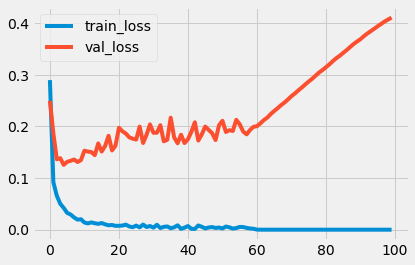

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss']);

CNN

In [3]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, MaxPooling2D,AveragePooling2D ,Flatten

In [4]:
X_train, y_train = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Train 60000.cdb')
X_test, y_test = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Test 20000.cdb')

In [5]:
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform(X_test)

In [6]:
X_train = np.array([X_train[i].reshape(32,32) for i in range(len(X_train))])
X_test = np.array([X_test[i].reshape(32,32) for i in range(len(X_test))])

In [7]:
n_features = X_train.shape[1]

In [ ]:
inpx = Input(shape=(n_features,n_features,1,))
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [ ]:
model = Model([inpx], layer7)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics= tf.keras.metrics.SparseCategoricalAccuracy())
 
model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 14s 11ms/step - loss: 0.1550 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.0906 - val_sparse_categorical_accuracy: 0.9726
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0421 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.0624 - val_sparse_categorical_accuracy: 0.9807
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0263 - sparse_categorical_accuracy: 0.9922 - val_loss: 0.0435 - val_sparse_categorical_accuracy: 0.9862
Epoch 4/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0199 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0333 - val_sparse_categorical_accuracy: 0.9896
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0151 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.0399 - val_sparse_categorical_accuracy: 0.9881
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0131 - sparse_cat

In [ ]:
y_pred  = model.predict(X_test)
predicted_categories = np.argmax(y_pred, axis = 1)
print(classification_report(y_test,predicted_categories,digits=4))

625/625 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0     0.9935    0.9960    0.9948      2000
         1.0     0.9896    0.9985    0.9940      2000
         2.0     0.9778    0.9910    0.9844      2000
         3.0     0.9923    0.9720    0.9821      2000
         4.0     0.9851    0.9935    0.9893      2000
         5.0     0.9925    0.9945    0.9935      2000
         6.0     0.9985    0.9925    0.9955      2000
         7.0     0.9980    0.9960    0.9970      2000
         8.0     0.9980    0.9960    0.9970      2000
         9.0     0.9925    0.9875    0.9900      2000

    accuracy                         0.9918     20000
   macro avg     0.9918    0.9918    0.9917     20000
weighted avg     0.9918    0.9918    0.9917     20000



LeNet on Hoda

In [ ]:
inpx = Input(shape=(n_features,n_features,1,))
layer1 = Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='valid')(inpx)
layer2 = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(layer1)
layer3 = Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='valid')(layer2)
layer4 = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(120, activation='relu')(layer5)
layer7 = Dense(84, activation='sigmoid')(layer6)
layer8 = Dense(10, activation='softmax')(layer7)

model2 = Model(inpx, layer8)
opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model2.compile(optimizer=opt, loss=loss, metrics=['sparse_categorical_accuracy'])
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test) ,epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3607 - sparse_categorical_accuracy: 0.9002 - val_loss: 0.1786 - val_sparse_categorical_accuracy: 0.9475
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9777 - val_loss: 0.1166 - val_sparse_categorical_accuracy: 0.9645
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0520 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.0920 - val_sparse_categorical_accuracy: 0.9711
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0378 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0718 - val_sparse_categorical_accuracy: 0.9776
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0289 - sparse_categorical_accuracy: 0.9911 - val_loss: 0.0607 - val_sparse_categorical_accuracy: 0.9820
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0243 - sparse_categorica

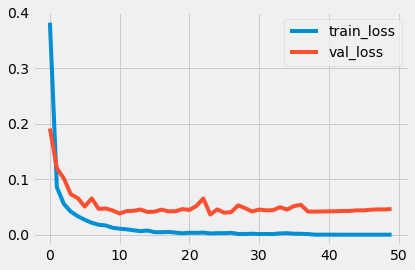

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss']);

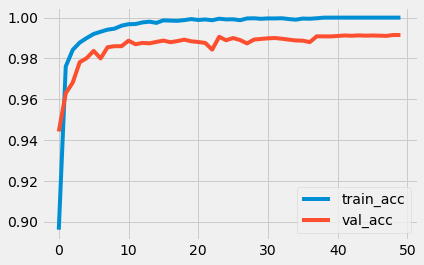

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.legend(['train_acc', 'val_acc']);

In [ ]:
y_pred  = model2.predict(X_test)
predicted_categories = np.argmax(y_pred, axis = 1)
print(classification_report(y_test,predicted_categories,digits=4))

625/625 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0     0.9970    0.9930    0.9950      2000
         1.0     0.9891    0.9995    0.9943      2000
         2.0     0.9792    0.9870    0.9831      2000
         3.0     0.9810    0.9805    0.9807      2000
         4.0     0.9870    0.9845    0.9857      2000
         5.0     0.9930    0.9935    0.9933      2000
         6.0     0.9940    0.9920    0.9930      2000
         7.0     0.9980    0.9950    0.9965      2000
         8.0     0.9965    0.9960    0.9962      2000
         9.0     0.9945    0.9880    0.9912      2000

    accuracy                         0.9909     20000
   macro avg     0.9909    0.9909    0.9909     20000
weighted avg     0.9909    0.9909    0.9909     20000



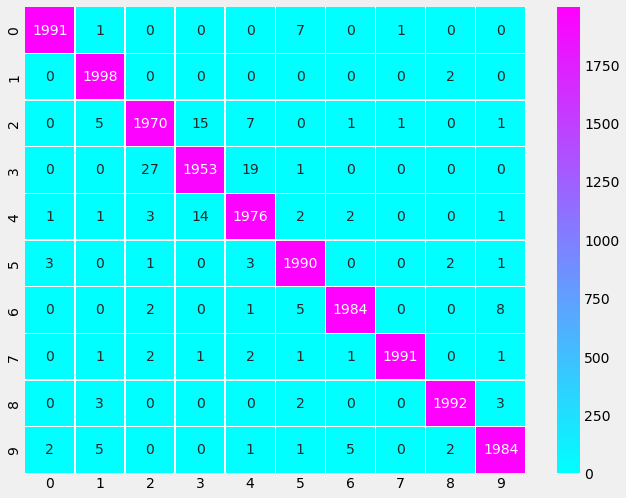

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion = confusion_matrix (y_test, predicted_categories , labels=list(np.arange(0,10)))
plt.figure(figsize=(10,8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='cool',linewidths=0.5);

Effect of BatchSize and Epochs

In [ ]:
inpx = Input(shape=(n_features,n_features,1,))
layer1 = Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='valid')(inpx)
layer2 = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(layer1)
layer3 = Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='valid')(layer2)
layer4 = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(120, activation='relu')(layer5)
layer7 = Dense(84, activation='sigmoid')(layer6)
layer8 = Dense(10, activation='softmax')(layer7)
opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
def compare(epochs,batch_size):
  model3 = Model(inpx, layer8)
  model3.compile(optimizer=opt, loss=loss, metrics=['sparse_categorical_accuracy'])
  start_tra = perf_counter()
  history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=False ,epochs=epochs, batch_size=batch_size)
  end_tra = perf_counter()
  y_pred  = model3.predict(X_test)
  predicted_categories = np.argmax(y_pred, axis = 1)
  time = end_tra - start_tra
  return f1_score(y_test,predicted_categories,average='macro') , time

In [ ]:
# batch size
scores_b = []
times_b = []
for i in tqdm([16,32,64,128,256]):
  score , time = compare(20,i)
  scores_b.append(score)
  times_b.append(time)

  0%|          | 0/5 [00:00<?, ?it/s]

625/625 [==============================] - 1s 2ms/step


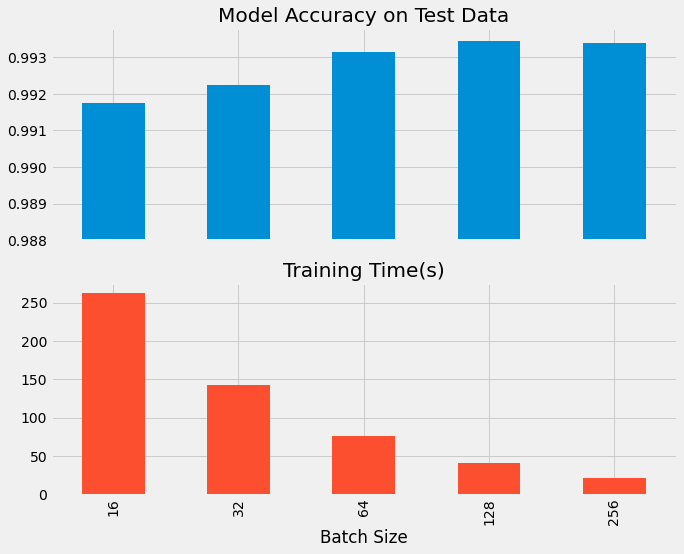

In [ ]:
score_time_b = pd.DataFrame()
score_time_b['scores'] = scores_b
score_time_b['times'] = times_b
score_time_b['batch_size'] = [16,32,64,128,256]
score_time_b=score_time_b.set_index('batch_size')

ax = score_time_b[['scores','times']].plot(kind='bar',subplots=True,legend=False,figsize=(10,8))
ax[0].set_ylim([0.988, 0.99380]);
ax[0].set_xlabel('Batch Size');
ax[0].set_title('Model Accuracy on Test Data')
ax[1].set_xlabel('Batch Size');
ax[1].set_title('Training Time(s)');

In [ ]:
# epochs
scores = []
times = []
for i in tqdm([20,50,100]):
  score , time = compare(i,128)
  scores.append(score)
  times.append(time)

  0%|          | 0/3 [00:00<?, ?it/s]

625/625 [==============================] - 1s 2ms/step


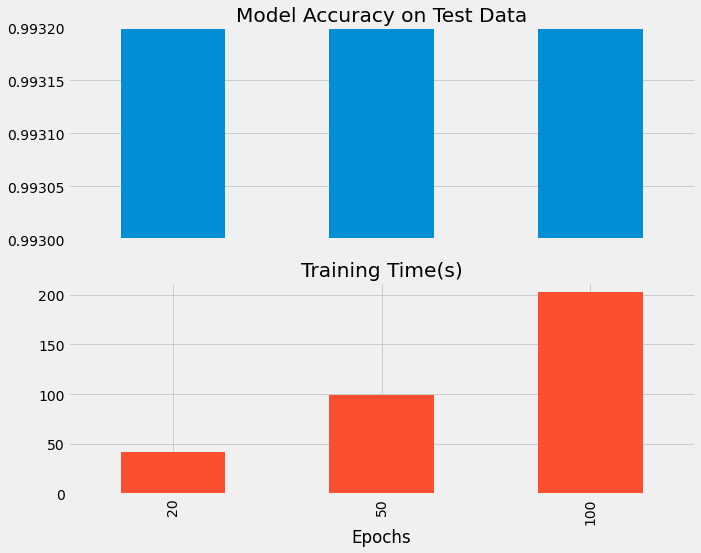

In [ ]:
score_time_df = pd.DataFrame()
score_time_df['scores'] = scores
score_time_df['times'] = times
score_time_df['epochs'] = [20,50,100]
score_time_df=score_time_df.set_index('epochs')

ax = score_time_df[['scores','times']].plot(kind='bar',subplots=True,legend=False,figsize=(10,8))
ax[0].set_ylim([0.993, 0.9932]);
ax[0].set_xlabel('Epochs');
ax[0].set_title('Model Accuracy on Test Data')
ax[1].set_xlabel('Epochs');
ax[1].set_title('Training Time(s)');

In [ ]:
inpx = Input(shape=(n_features,n_features,1,))
layer1 = Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='valid')(inpx)
layer2 = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(layer1)
layer3 = Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='valid')(layer2)
layer4 = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(120, activation='relu')(layer5)
layer7 = Dense(84, activation='sigmoid')(layer6)
layer8 = Dense(10, activation='softmax')(layer7)
opt1 = tf.keras.optimizers.Adam() #0
opt2 = tf.keras.optimizers.SGD() #1
loss = tf.keras.losses.SparseCategoricalCrossentropy()
def compare_opt(opt):
  model4 = Model(inpx, layer8)
  model4.compile(optimizer=opt, loss=loss, metrics=['sparse_categorical_accuracy'])
  start_tra = perf_counter()
  history = model4.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=False ,epochs=50, batch_size=128)
  end_tra = perf_counter()
  y_pred  = model4.predict(X_test)
  predicted_categories = np.argmax(y_pred, axis = 1)
  time = end_tra - start_tra
  return f1_score(y_test,predicted_categories,average='macro') , time

  0%|          | 0/2 [00:00<?, ?it/s]

625/625 [==============================] - 1s 2ms/step


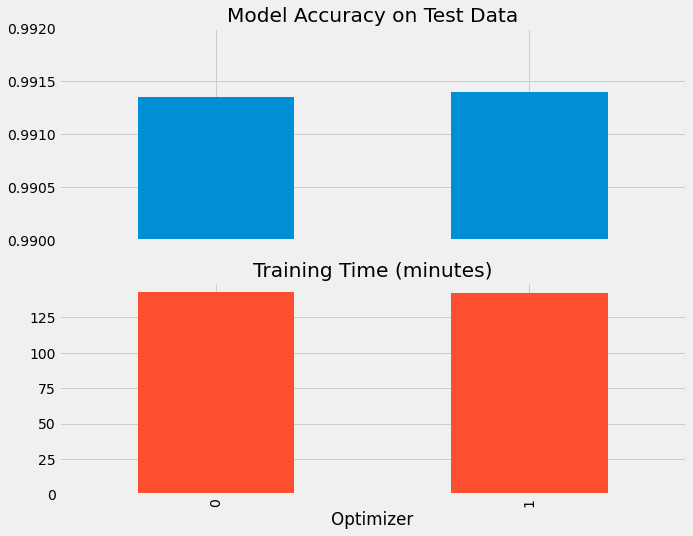

In [ ]:
# optimizer
scores = []
times = []
for i in tqdm([opt1,opt2]):
  score , time = compare_opt(i)
  scores.append(score)
  times.append(time)

opt_df = pd.DataFrame()
opt_df['scores'] = scores
opt_df['times'] = times
opt_df['optimizer'] = [1,2]

ax = opt_df[['scores','times']].plot(kind='bar',subplots=True,legend=False,figsize=(10,8))
ax[0].set_ylim([0.990, 0.992]);
ax[0].set_xlabel('Optimizer');
ax[0].set_title('Model Accuracy on Test Data')
ax[1].set_xlabel('Optimizer');
ax[1].set_title('Training Time (minutes)');

In [ ]:
inpx = Input(shape=(n_features,n_features,1,))
layer1 = Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='valid')(inpx)
layer2 = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(layer1)
layer3 = Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='valid')(layer2)
layer4 = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(120, activation='relu')(layer5)
layer7 = Dense(84, activation='relu')(layer6)
layer8 = Dense(10, activation='softmax')(layer7)

model5 = Model(inpx, layer8)
opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model5.compile(optimizer=opt, loss=loss, metrics=['sparse_categorical_accuracy'])
history = model5.fit(X_train, y_train, validation_data=(X_test, y_test) ,epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2340 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.1304 - val_sparse_categorical_accuracy: 0.9607
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0543 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.0748 - val_sparse_categorical_accuracy: 0.9760
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0355 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0552 - val_sparse_categorical_accuracy: 0.9823
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0274 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.0581 - val_sparse_categorical_accuracy: 0.9824
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9929 - val_loss: 0.0489 - val_sparse_categorical_accuracy: 0.9850
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0183 - sparse_categorica

In [ ]:
y_pred  = model5.predict(X_test)
predicted_categories = np.argmax(y_pred, axis = 1)
print(classification_report(y_test,predicted_categories,digits=4))

625/625 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0     0.9950    0.9970    0.9960      2000
         1.0     0.9930    0.9995    0.9963      2000
         2.0     0.9856    0.9900    0.9878      2000
         3.0     0.9904    0.9825    0.9864      2000
         4.0     0.9880    0.9915    0.9898      2000
         5.0     0.9945    0.9945    0.9945      2000
         6.0     0.9955    0.9915    0.9935      2000
         7.0     0.9990    0.9970    0.9980      2000
         8.0     0.9990    0.9980    0.9985      2000
         9.0     0.9935    0.9920    0.9927      2000

    accuracy                         0.9933     20000
   macro avg     0.9934    0.9933    0.9933     20000
weighted avg     0.9934    0.9933    0.9933     20000



LeNet on Mnist

In [ ]:
! gdown 1I8j_kfwk987-Rnhu05geMYXBtQPw1Uob
! gdown 1-hoSUApfWdS3R-iA2e2T1OdRfSvnSLjR

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = pd.read_csv('Kaggle digits train.csv')
y = X.pop('label')
X = X.to_numpy()
y = y.to_numpy()
X_train,X_val,y_train,y_val = train_test_split(X,y)

X_test = pd.read_csv('Kaggle digits test.csv')
X_test = X_test.to_numpy()

In [ ]:
X_train = np.array([X_train[i].reshape(28,28) for i in range(len(X_train))])
X_val = np.array([X_val[i].reshape(28,28) for i in range(len(X_val))])
X_test = np.array([X_test[i].reshape(28,28) for i in range(len(X_test))])

In [ ]:
n_features = X_train.shape[1]

In [ ]:
inpx = Input(shape=(n_features,n_features,1,))
layer1 = Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='tanh', padding='valid')(inpx)
layer2 = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(layer1)
layer3 = Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation='tanh', padding='valid')(layer2)
layer4 = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(120, activation='tanh')(layer5)
layer7 = Dense(84, activation='tanh')(layer6)
layer8 = Dense(10, activation='softmax')(layer7)

model = Model(inpx, layer8)
opt = tf.keras.optimizers.SGD()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['sparse_categorical_accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val) ,epochs=20, batch_size=16)

In [ ]:
y_pred  = model.predict(X_test)
predicted_categories = np.argmax(y_pred, axis = 1)
predictions = pd.Series(predicted_categories, name='Label')
image_id = pd.Series(range(1,28001), name = 'ImageId')
predictions = pd.concat([image_id, predictions], axis = 1)
predictions.to_csv('submission.csv', index=False)